# Import Necessary Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler     ## Standardization Technique


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import Warning Library
import warnings
warnings.filterwarnings("ignore")

# Read The Dataset

In [3]:
df = pd.read_csv("Prodigy University Dataset.csv")

In [4]:
#  Display 5 rows of the dataset

df.head()

,sat_sum,hs_gpa,fy_gpa
0,508,3.40,3.18
1,488,4.00,3.33
2,464,3.75,3.25
3,380,3.75,2.42
4,428,4.00,2.63


In [5]:
# Shape of the dataset
df.shape

(1000, 3)

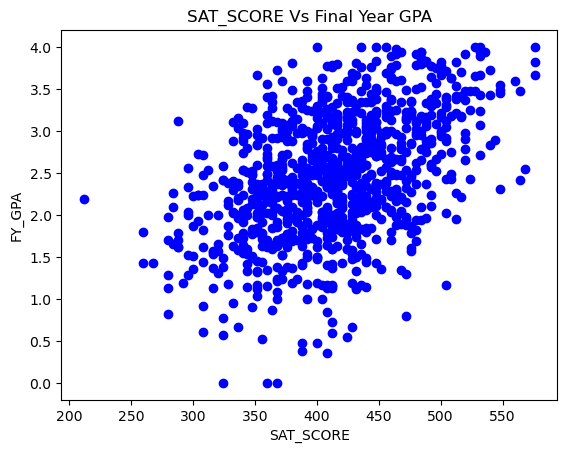

In [6]:
#  Create scatter plot
plt.scatter(df['sat_sum'], df['fy_gpa'], color='blue')

plt.title("SAT_SCORE Vs Final Year GPA")
plt.xlabel("SAT_SCORE")
plt.ylabel("FY_GPA")

plt.show()

In [7]:
# Conclusion : 
# There is a positive linear relationship – as SAT scores increase, the final year GPA tends to increase as well.

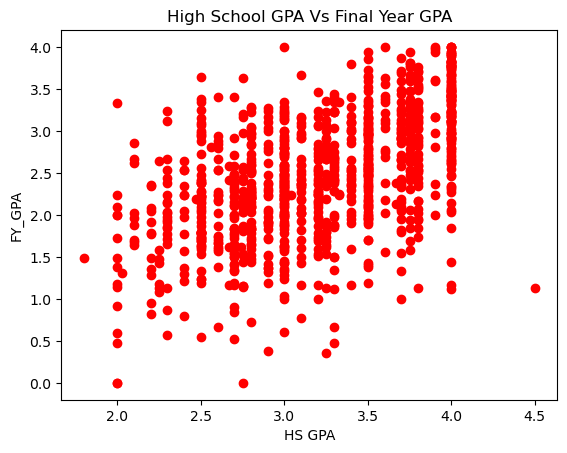

In [8]:
plt.scatter(df['hs_gpa'], df['fy_gpa'], color='red')

plt.title("High School GPA Vs Final Year GPA")
plt.xlabel("HS GPA")
plt.ylabel("FY_GPA")

plt.show()

In [9]:
# Conclusion :
# # This also shows a positive linear relationship, but the data seems less spread out compared to the SAT plot

# Feature Engineering

# Data Cleaning

In [10]:
# Check Missing Values
df.isnull().sum()

sat_sum    0
hs_gpa     0
fy_gpa     0
dtype: int64

In [11]:
# Check Dtype & Non-Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   hs_gpa   1000 non-null   float64
 2   fy_gpa   1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [12]:
# Descriptive Statistics of the dataset
df.describe()

,sat_sum,hs_gpa,fy_gpa
count,1000.000000,1000.000000,1000.000000
mean,413.316000,3.198100,2.467950
std,57.149472,0.541647,0.740805
min,212.000000,1.800000,0.000000
25%,372.000000,2.800000,1.980000
50%,412.000000,3.200000,2.465000
75%,452.000000,3.700000,3.020000
max,576.000000,4.500000,4.000000


# EDA (Exploratory Data Analysis)

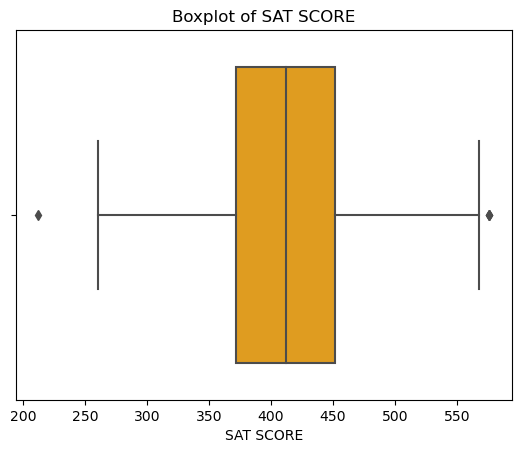

In [13]:
sns.boxplot(x=df['sat_sum'], color='orange')

plt.title('Boxplot of SAT SCORE')
plt.xlabel('SAT SCORE')

plt.show()

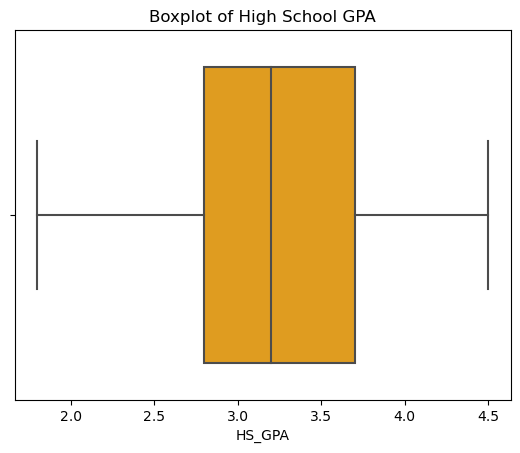

In [14]:
sns.boxplot(x=df['hs_gpa'], color='orange')

plt.title('Boxplot of High School GPA')
plt.xlabel('HS_GPA')

plt.show()

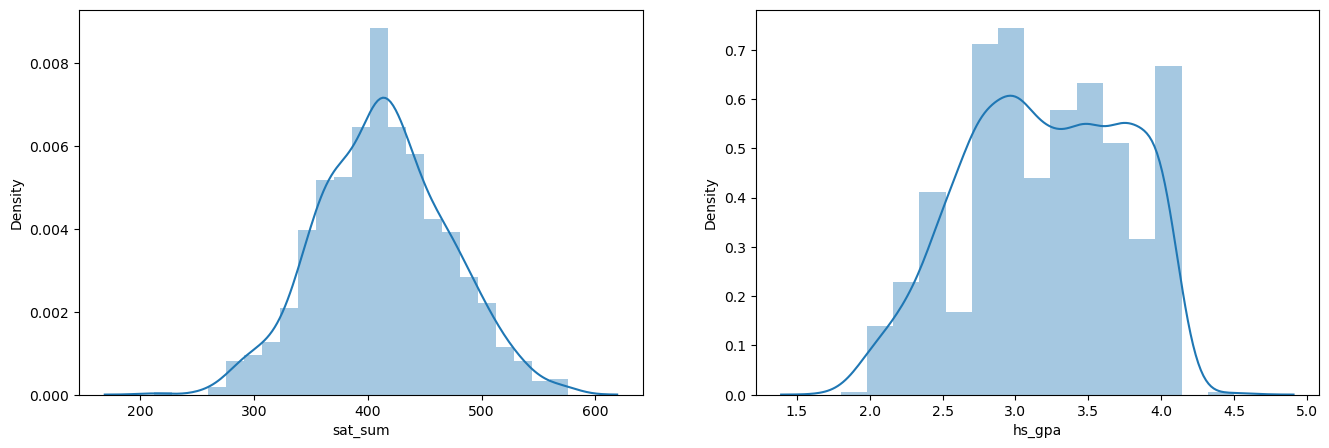

In [15]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df['sat_sum'])

plt.subplot(1,2,2)
sns.distplot(df['hs_gpa'])

plt.show()

In [16]:
# For SAT_SCORE  -->  graph looks close to normal, so Z-score is valid here.

# For HS_GPA --> Since the distribution is bimodal and skewed, Z-score may not be very effective or reliable.

# Outlier Removal / Detection

In [17]:
# An outlier is a data point that significantly differs from other observations in the dataset, 
# potentially indicating variability, error, or a rare event.

# Z - Score Technique

In [18]:
print(f"Mean Value of SAT_Score {df['sat_sum'].mean()}")
print(f"Std Value of SAT_Score {df['sat_sum'].std()}")
print(f"Min Value of SAT_Score {df['sat_sum'].min()}")
print(f"Max Value of SAT_Score {df['sat_sum'].max()}")

Mean Value of SAT_Score 413.316
Std Value of SAT_Score 57.149472492807966
Min Value of SAT_Score 212
Max Value of SAT_Score 576


In [19]:
# Finding the boundary value

print("Upper boundary",df['sat_sum'].mean() + 3*df['sat_sum'].std())
print("Lower boundary",df['sat_sum'].mean() - 3*df['sat_sum'].std())

Upper boundary 584.7644174784239
Lower boundary 241.86758252157608


In [20]:
# Finding the outliers

df[(df['sat_sum'] > 584.76) | (df['sat_sum'] < 241.86)]

,sat_sum,hs_gpa,fy_gpa
509,212,2.47,2.19


# # Treat Outlier

In [21]:
# Trimming

new_df = df[(df['sat_sum'] < 584.76) & (df['sat_sum'] > 241.86)]
new_df.shape

(999, 3)

# Data Preprocessing

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler objects
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply and overwrite same column
new_df['sat_sum'] = std_scaler.fit_transform(new_df[['sat_sum']])
new_df['hs_gpa'] = minmax_scaler.fit_transform(new_df[['hs_gpa']])

In [23]:
# Here, we can see Our data has converted into fixed range.
round(new_df.describe(),2)

,sat_sum,hs_gpa,fy_gpa
count,999.00,999.00,999.00
mean,0.00,0.52,2.47
std,1.00,0.20,0.74
min,-2.70,0.00,0.00
25%,-0.73,0.37,1.98
50%,-0.03,0.52,2.47
75%,0.68,0.70,3.02
max,2.86,1.00,4.00


In [24]:
# Seperate Dependent and Independent Variable

X = new_df.drop(columns=["fy_gpa"])
y = new_df["fy_gpa"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN Model

In [64]:
from tensorflow.keras.optimizers import Adam

In [65]:
model = Sequential([
    Dense(1, input_dim=2, activation='linear')
    ])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Predict
predictions = model.predict(X_test)
print("First 5 Predicted GPA values:", predictions[:5].flatten())

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1421
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7259
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3972 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9319
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0958 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4169 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0036 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6856
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5629
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4860
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4290 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3934 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3623
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3606 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.36

In [66]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [67]:
from sklearn.metrics import r2_score, mean_squared_error
# Get predictions
y_preds = model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_preds)
print("R2 Score (Accuracy):", r2)

# Mean Squared Error
mse = mean_squared_error(y_test, preds)
print("Mean Squared Error:", mse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R2 Score (Accuracy): 0.3837072942769141
Mean Squared Error: 0.33248358742673084


# Optimizers

In [43]:
from keras.optimizers import SGD, RMSprop

# Simple ANN model
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(1, activation='linear')
])

In [44]:
# SGD Optimizer
sgd_optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=sgd_optimizer, loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=30)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3361 - mae: 1.6425   
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4483 - mae: 0.5338 
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3823 - mae: 0.4931 
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3485 - mae: 0.4688 
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3528 - mae: 0.4604 
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3736 - mae: 0.4827 
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3709 - mae: 0.4695 
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3654 - mae: 0.4740 
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3569 - mae: 0.4754 
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3437 - mae: 0.4625
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3544 - mae: 0.4674 
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3678 - mae: 0.4818 
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━

In [45]:
# RMSProp Optimizer
rms_optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=rms_optimizer, loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3679 - mae: 0.4750  
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3580 - mae: 0.4697 
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3424 - mae: 0.4676 
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3794 - mae: 0.4874 
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3909 - mae: 0.4911 
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3573 - mae: 0.4665 
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3590 - mae: 0.4726 
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3418 - mae: 0.4544 
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3371 - mae: 0.4575 
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3453 - mae: 0.4605 
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3569 - mae: 0.4700 
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3495 - mae: 0.4626 
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━

In [48]:
from sklearn.metrics import r2_score

preds = model.predict(X_test)
r2 = r2_score(y_test, y_preds)
print("R2 Score with this optimizer:", r2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R2 Score with this optimizer: 0.3884490487582266
